In [136]:
import pandas as pd
import re
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter
from sklearn.cluster import KMeans
sns.set_theme(style = "ticks", rc = {"axes.spines.right": False, "axes.spines.top": False})

# #0 Importando o(s) datasets

In [137]:
LeagueofLegends = pd.read_csv('Datasets/LeagueofLegends.csv')
dfKills = pd.read_csv('Datasets/kills.csv')
dfmatchinfo = pd.read_csv('Datasets/matchinfo.csv')


# #1 Limpeza e organização dos dados

In [138]:
# Primeiro verifico o tipo de dado que compõe a coluna, se ele está ideal para uso ou se deve ser alterado
print(type(LeagueofLegends['League'][0]))
# Como a coluna League trata-se da liga na qual o dado foi obtido, logo, uma string
print(type(LeagueofLegends['Year'][0]))
# A coluna ano é a coluna do ano no qual o dado foi obtido, logo, um numero inteiro
type(LeagueofLegends['Season'][0])
type(LeagueofLegends['Type'][0])
type(LeagueofLegends['blueTeamTag'][0])
type(LeagueofLegends['bResult'][0])
type(LeagueofLegends['rResult'][0])
type(LeagueofLegends['redTeamTag'][0])
type(LeagueofLegends['gamelength'][0]) #Em minutos
type(LeagueofLegends['golddiff'][0]) #Transformar em Lista
type(LeagueofLegends['goldblue'][0]) #Transformar em lista
type(LeagueofLegends['bTowers'][0]) #Transformar em lista (Time,Lane,Type)
type(LeagueofLegends['bInhibs'][0]) #Transformar em lista (Time, Type)
type(LeagueofLegends['bDragons'][0]) #Transformar em lista (Time, Type), encontrar forma de contar dragões
type(LeagueofLegends['bBarons'][0]) #Transformar em lista(qnt, Time)
type(LeagueofLegends['bHeralds'][0]) #Transformar em lista(qnt, Time)
type(LeagueofLegends['goldred'][0]) #Transformar em lista
type(LeagueofLegends['rTowers'][0]) #Transformar em lista (Time,Lane,Type)
type(LeagueofLegends['rInhibs'][0]) #Transformar em lista (Time, Type)
type(LeagueofLegends['rDragons'][0]) #Transformar em lista (Time, Type), encontrar forma de contar dragões
type(LeagueofLegends['rBarons'][0]) #Transformar em lista(qnt, Time)
type(LeagueofLegends['rHeralds'][0]) #Transformar em lista(qnt, Time)

type(LeagueofLegends['blueTopChamp'][0])
type(LeagueofLegends['goldblueTop'][0]) #Transsformar em lista
type(LeagueofLegends['blueJungleChamp'][0])
type(LeagueofLegends['goldblueJungle'][0]) #Transsformar em lista
type(LeagueofLegends['redMiddleChamp'][0])
type(LeagueofLegends['goldblueMiddle'][0]) #Transsformar em lista
type(LeagueofLegends['blueADCChamp'][0])
type(LeagueofLegends['goldblueADC'][0]) #Transsformar em lista
type(LeagueofLegends['blueSupportChamp'][0])
type(LeagueofLegends['goldblueSupport'][0]) #Transsformar em lista
type(LeagueofLegends['blueBans'][0]) #Transformar em lista
type(LeagueofLegends['blueTop'][0])
type(LeagueofLegends['blueJungle'][0])
type(LeagueofLegends['blueMiddle'][0])
type(LeagueofLegends['blueADC'][0])
type(LeagueofLegends['blueSupport'][0])

type(LeagueofLegends['redTopChamp'][0])
type(LeagueofLegends['goldredTop'][0]) #Transsformar em lista
type(LeagueofLegends['redJungleChamp'][0])
type(LeagueofLegends['goldredJungle'][0]) #Transsformar em lista
type(LeagueofLegends['redMiddleChamp'][0])
type(LeagueofLegends['goldredMiddle'][0]) #Transsformar em lista
type(LeagueofLegends['redADCChamp'][0])
type(LeagueofLegends['goldredADC'][0]) #Transsformar em lista
type(LeagueofLegends['redSupportChamp'][0])
type(LeagueofLegends['goldredSupport'][0]) #Transsformar em lista
type(LeagueofLegends['redBans'][0]) #Transformar em lista
type(LeagueofLegends['redTop'][0])
type(LeagueofLegends['redJungle'][0])
type(LeagueofLegends['redMiddle'][0])
type(LeagueofLegends['redADC'][0])
type(LeagueofLegends['redSupport'][0])


<class 'str'>
<class 'numpy.int64'>


str

In [139]:
#Função para tranasformação simples de str para lista
def transListSimple(data, tipo = int):
    temp = []
    if(type(data[0]) == str):
        for i in data:
            lista = []
            i = i.replace('[','').replace(']','').split(', ')
            for j in range(len(i)):
                if(type(tipo) == int):
                    lista.append(i[j].isnumeric())
                else:
                    lista.append(i[j])
            temp.append(lista)
        return temp
    else:
        return data

In [140]:
LeagueofLegends['golddiff'][0]

'[0, 0, -14, -65, -268, -431, -488, -789, -494, -625, -1044, -313, -760, -697, -790, -611, 240, 845, 797, 1422, 987, 169, 432, 491, 1205, 1527, 1647, 1847, 3750, 4719, 3561, 3367, 2886, 2906, 4411, 4473, 4639, 4762, 4686, 6057]'

## APAGAR CELULA DE BAIXO

In [141]:
def killDF(column):
    out = []
    for i in range(len(LeagueofLegends[f'{column}'])):   
        string = LeagueofLegends[f'{column}'][i][1:-1:]
        lista = string.split('], [')
        lista[0] = lista[0][1::] #primeiro elemento sem o '['
        lista[len(lista)-1] = lista[len(lista)-1][:-1:] #ultimo elemento sem o ']'

        # ------------------------------------------------------
        temp = []
        for j in lista:    
            if (j != ""):
                c = j.replace(re.search(r'(?<=\[).*(?=\])', j)[0], '') #retirando a lista da string
                d = c.split(', ')

                d[0] = float(d[0].replace('.',''))/10**len(re.search(r'(?<=\.).*', d[0])[0])
                d[1] = d[1].replace("'","")
                d[2] = d[2].replace("'","")
                d[3] = re.search(r'(?<=\[).*(?=\])', j)[0].split(',')
                if d[4] != "": d[4] = float(d[4])
                if d[5] != "": d[5] = float(d[5])
                
                if (len(d[3]) > 0):
                    for k in range(1,len(d[3])):
                        d[3][k] = d[3][k].replace("'","")
                    for k in range(len(d[3])):
                        d[3][k] = d[3][k].replace(" '","").replace("'","")

            else:
                d = ['NotKilled']
            temp.append(d)
        out.append(temp)

    return out

In [142]:
jogos = range(len(dfKills['Address'].unique()))
JogosLink = dfKills['Address'].unique()
df_jogos = pd.DataFrame(data =JogosLink, index=jogos).reset_index()
df_jogos['Address'] = df_jogos[0]
df_jogos['IdJogo'] = df_jogos['index']
df_jogos = df_jogos.drop(columns=['index',0])
df_jogos 

Address  IdJogo
0     http://matchhistory.na.leagueoflegends.com/en/...       0
1     http://matchhistory.na.leagueoflegends.com/en/...       1
2     http://matchhistory.na.leagueoflegends.com/en/...       2
3     http://matchhistory.na.leagueoflegends.com/en/...       3
4     http://matchhistory.na.leagueoflegends.com/en/...       4
...                                                 ...     ...
7615  https://matchhistory.euw.leagueoflegends.com/e...    7615
7616  https://matchhistory.euw.leagueoflegends.com/e...    7616
7617  https://matchhistory.na.leagueoflegends.com/en...    7617
7618  https://matchhistory.na.leagueoflegends.com/en...    7618
7619  https://matchhistory.na.leagueoflegends.com/en...    7619

[7620 rows x 2 columns]

In [143]:
dfKills = dfKills.merge(LeagueofLegends[['Address', 'bResult']])
dfKills['bResult'] = dfKills.bResult.map({1 : 'Win', 0 : 'Loser'})


In [144]:
dfKills

Address    Team    Time  \
0       http://matchhistory.na.leagueoflegends.com/en/...  bKills  10.820   
1       http://matchhistory.na.leagueoflegends.com/en/...  bKills  16.286   
2       http://matchhistory.na.leagueoflegends.com/en/...  bKills  18.733   
3       http://matchhistory.na.leagueoflegends.com/en/...  bKills  18.880   
4       http://matchhistory.na.leagueoflegends.com/en/...  bKills  27.005   
...                                                   ...     ...     ...   
191064  https://matchhistory.na.leagueoflegends.com/en...  rKills  35.086   
191065  https://matchhistory.na.leagueoflegends.com/en...  rKills  40.706   
191066  https://matchhistory.na.leagueoflegends.com/en...  rKills  40.711   
191067  https://matchhistory.na.leagueoflegends.com/en...  rKills  41.113   
191068  https://matchhistory.na.leagueoflegends.com/en...  rKills  41.201   

                Victim          Killer      Assist_1        Assist_2  \
0               C9 Hai    TSM Bjergsen           NaN             NaN   
1       C9 LemonNation  TSM WildTurtle  TSM Santorin    TSM Bjergsen   
2               C9 Hai    TSM Bjergsen  TSM Santorin  TSM WildTurtle   
3            C9 Meteos       TSM Dyrus  TSM Santorin    TSM Bjergsen   
4             C9 Balls    TSM Bjergsen     TSM Dyrus    TSM Santorin   
...                ...             ...           ...             ...   
191064     TTC Papryze      LGC Claire     LGC Ceres       LGC Sybol   
191065         TTC Low        LGC Raid     LGC Ceres       LGC Sybol   
191066      TTC Swathe      LGC Claire     LGC Ceres       LGC Sybol   
191067     TTC Tilting      LGC Claire     LGC Ceres       LGC Sybol   
191068     TTC Papryze      LGC Claire     LGC Ceres       LGC Sybol   

              Assist_3     Assist_4  x_pos y_pos bResult  
0                  NaN          NaN   9229  8469     Win  
1          TSM Lustboy          NaN  13908  5960     Win  
2          TSM Lustboy          NaN   8281  7889     Win  
3       TSM WildTurtle  TSM Lustboy   8522  8895     Win  
4       TSM WildTurtle  TSM Lustboy   8902  7643     Win  
...                ...          ...    ...   ...     ...  
191064        LGC Raid    LGC Decoy   6424  9256   Loser  
191065       LGC Decoy          NaN   1464  2974   Loser  
191066        LGC Raid    LGC Decoy   1014  4828   Loser  
191067             NaN          NaN    693  2924   Loser  
191068             NaN          NaN    679  2602   Loser  

[191069 rows x 12 columns]

# Visualização dos dados

In [145]:
dfKills.loc[dfKills.x_pos == 'TooEarly'] = np.NaN
dfKills.x_pos = dfKills.x_pos.astype(float)
dfKills.loc[dfKills.y_pos == 'TooEarly'] = np.NaN
dfKills.y_pos = dfKills.y_pos.astype(float)

In [146]:
dfKills.y_pos = dfKills.y_pos.dropna()
dfKills.x_pos = dfKills.x_pos.dropna()

In [147]:
dfKills

Address    Team    Time  \
0       http://matchhistory.na.leagueoflegends.com/en/...  bKills  10.820   
1       http://matchhistory.na.leagueoflegends.com/en/...  bKills  16.286   
2       http://matchhistory.na.leagueoflegends.com/en/...  bKills  18.733   
3       http://matchhistory.na.leagueoflegends.com/en/...  bKills  18.880   
4       http://matchhistory.na.leagueoflegends.com/en/...  bKills  27.005   
...                                                   ...     ...     ...   
191064  https://matchhistory.na.leagueoflegends.com/en...  rKills  35.086   
191065  https://matchhistory.na.leagueoflegends.com/en...  rKills  40.706   
191066  https://matchhistory.na.leagueoflegends.com/en...  rKills  40.711   
191067  https://matchhistory.na.leagueoflegends.com/en...  rKills  41.113   
191068  https://matchhistory.na.leagueoflegends.com/en...  rKills  41.201   

                Victim          Killer      Assist_1        Assist_2  \
0               C9 Hai    TSM Bjergsen           NaN             NaN   
1       C9 LemonNation  TSM WildTurtle  TSM Santorin    TSM Bjergsen   
2               C9 Hai    TSM Bjergsen  TSM Santorin  TSM WildTurtle   
3            C9 Meteos       TSM Dyrus  TSM Santorin    TSM Bjergsen   
4             C9 Balls    TSM Bjergsen     TSM Dyrus    TSM Santorin   
...                ...             ...           ...             ...   
191064     TTC Papryze      LGC Claire     LGC Ceres       LGC Sybol   
191065         TTC Low        LGC Raid     LGC Ceres       LGC Sybol   
191066      TTC Swathe      LGC Claire     LGC Ceres       LGC Sybol   
191067     TTC Tilting      LGC Claire     LGC Ceres       LGC Sybol   
191068     TTC Papryze      LGC Claire     LGC Ceres       LGC Sybol   

              Assist_3     Assist_4    x_pos   y_pos bResult  
0                  NaN          NaN   9229.0  8469.0     Win  
1          TSM Lustboy          NaN  13908.0  5960.0     Win  
2          TSM Lustboy          NaN   8281.0  7889.0     Win  
3       TSM WildTurtle  TSM Lustboy   8522.0  8895.0     Win  
4       TSM WildTurtle  TSM Lustboy   8902.0  7643.0     Win  
...                ...          ...      ...     ...     ...  
191064        LGC Raid    LGC Decoy   6424.0  9256.0   Loser  
191065       LGC Decoy          NaN   1464.0  2974.0   Loser  
191066        LGC Raid    LGC Decoy   1014.0  4828.0   Loser  
191067             NaN          NaN    693.0  2924.0   Loser  
191068             NaN          NaN    679.0  2602.0   Loser  

[191069 rows x 12 columns]

In [148]:
assist_kill = (dfKills.filter(like='Assist_').notna().sum(axis=1)+1)/10
dfKills['qnt_assist'] = assist_kill

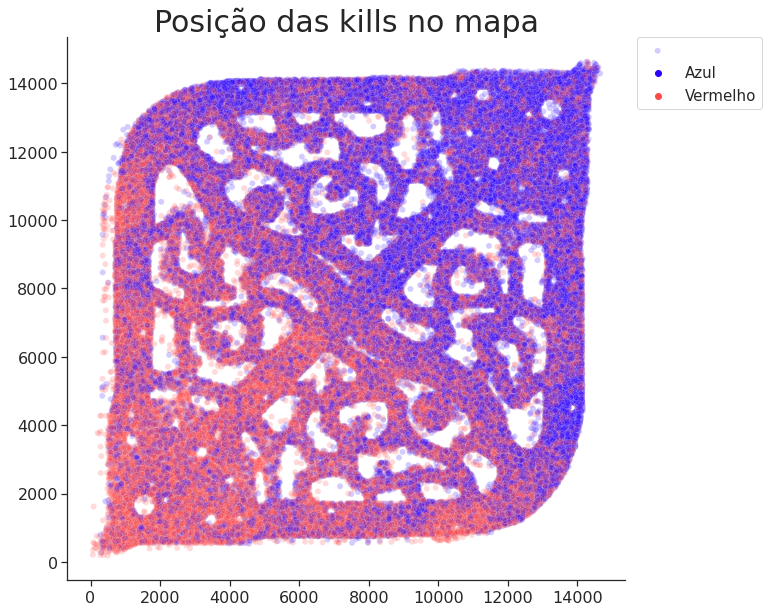

In [186]:
u = sns.scatterplot(data = dfKills, y = 'y_pos', x = 'x_pos', hue = 'Team', alpha = 0.2, palette = ['#2A00FF', '#FF4848'])
u.set_title('Posição das kills no mapa', fontsize = 30)
u.figure.set_size_inches(10,10)
u.tick_params(labelsize = 16)
u.set_xlabel('')
u.set_ylabel('')
plt.legend(labels = ['','Azul','Vermelho'], bbox_to_anchor=(1.02, 1), loc='upper left',prop={'size': 15}, borderaxespad=0)


In [150]:
EarlyKill = dfKills.loc[dfKills.Time <= 15]
MidKill = dfKills.loc[(dfKills.Time > 15) & (dfKills.Time < 25)]
LateKill = dfKills.loc[dfKills.Time > 25]

In [151]:
EarlyKill

Address    Team    Time  \
0       http://matchhistory.na.leagueoflegends.com/en/...  bKills  10.820   
25      http://matchhistory.na.leagueoflegends.com/en/...  bKills  11.104   
26      http://matchhistory.na.leagueoflegends.com/en/...  bKills  12.332   
27      http://matchhistory.na.leagueoflegends.com/en/...  bKills  12.392   
28      http://matchhistory.na.leagueoflegends.com/en/...  bKills  12.665   
...                                                   ...     ...     ...   
191035  https://matchhistory.na.leagueoflegends.com/en...  bKills  10.304   
191036  https://matchhistory.na.leagueoflegends.com/en...  bKills  14.626   
191046  https://matchhistory.na.leagueoflegends.com/en...  rKills  10.327   
191047  https://matchhistory.na.leagueoflegends.com/en...  rKills  12.918   
191048  https://matchhistory.na.leagueoflegends.com/en...  rKills  12.993   

              Victim        Killer     Assist_1     Assist_2    Assist_3  \
0             C9 Hai  TSM Bjergsen          NaN          NaN         NaN   
25      DIG Shiphtur     CST Jesiz  CST Impaler          NaN         NaN   
26       DIG Crumbzz      CST Cris    CST Sheep          NaN         NaN   
27        DIG CoreJJ      CST Cris  CST Impaler     CST Mash         NaN   
28         DIG Gamsu      CST Cris  CST Impaler     CST Mash   CST Sheep   
...              ...           ...          ...          ...         ...   
191035    LGC Claire    TTC Swathe  TTC Papryze     TTC Shok         NaN   
191036    LGC Claire      TTC Shok   TTC Swathe  TTC Tilting         NaN   
191046   TTC Papryze     LGC Ceres    LGC Sybol          NaN         NaN   
191047       TTC Low     LGC Decoy    LGC Ceres    LGC Sybol  LGC Claire   
191048   TTC Tilting    LGC Claire    LGC Ceres    LGC Sybol    LGC Raid   

         Assist_4    x_pos    y_pos bResult  qnt_assist  
0             NaN   9229.0   8469.0     Win         0.1  
25            NaN   9294.0   8716.0   Loser         0.2  
26            NaN   9601.0   5282.0   Loser         0.2  
27            NaN   9967.0   6811.0   Loser         0.3  
28            NaN  10870.0   5390.0   Loser         0.4  
...           ...      ...      ...     ...         ...  
191035        NaN   7830.0   7720.0   Loser         0.3  
191036        NaN   6540.0   7761.0   Loser         0.3  
191046        NaN   1959.0  11982.0   Loser         0.2  
191047   LGC Raid  10182.0    924.0   Loser         0.5  
191048  LGC Decoy   9671.0   1615.0   Loser         0.5  

[42642 rows x 13 columns]

<AxesSubplot:xlabel='Time', ylabel='Count'>

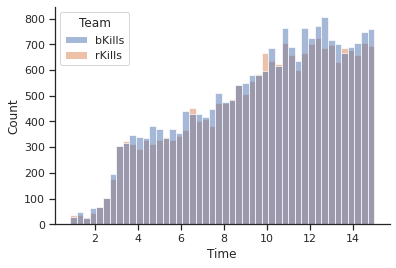

In [152]:
sns.histplot(data = EarlyKill, x='Time', hue = 'Team')

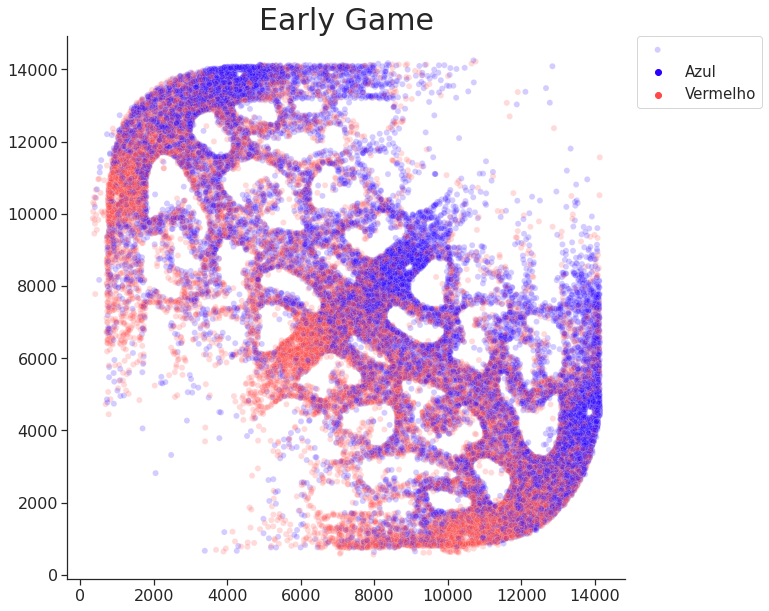

In [187]:
u = sns.scatterplot(data = EarlyKill, y='y_pos', x='x_pos', hue='Team', alpha=0.2, legend = True, palette=['#2A00FF', '#FF4848'])
u.set_title('Early Game', fontsize = 30)
u.figure.set_size_inches(10,10)
u.tick_params(labelsize = 16)
u.set_xlabel('')
u.set_ylabel('')
plt.legend(labels = ['', 'Azul','Vermelho'], bbox_to_anchor=(1.02, 1), loc='upper left',prop={'size': 15}, borderaxespad=0)

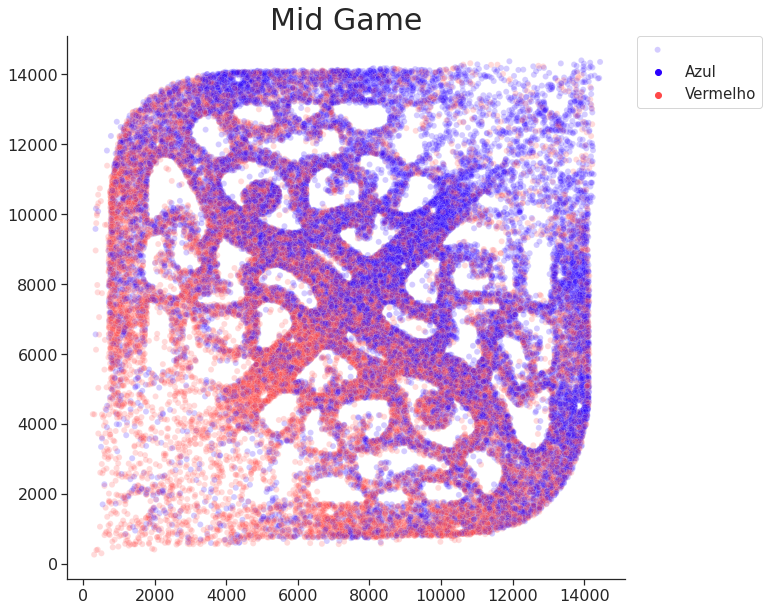

In [188]:
u = sns.scatterplot(data = MidKill, y='y_pos', x='x_pos', hue='Team', alpha=0.2, palette=['#2A00FF', '#FF4848'])
u.set_title('Mid Game', fontsize = 30)
u.figure.set_size_inches(10,10)
u.tick_params(labelsize = 16)
u.set_xlabel('')
u.set_ylabel('')
plt.legend(labels = ['', 'Azul','Vermelho'], bbox_to_anchor=(1.02, 1), loc='upper left',prop={'size': 15}, borderaxespad=0)

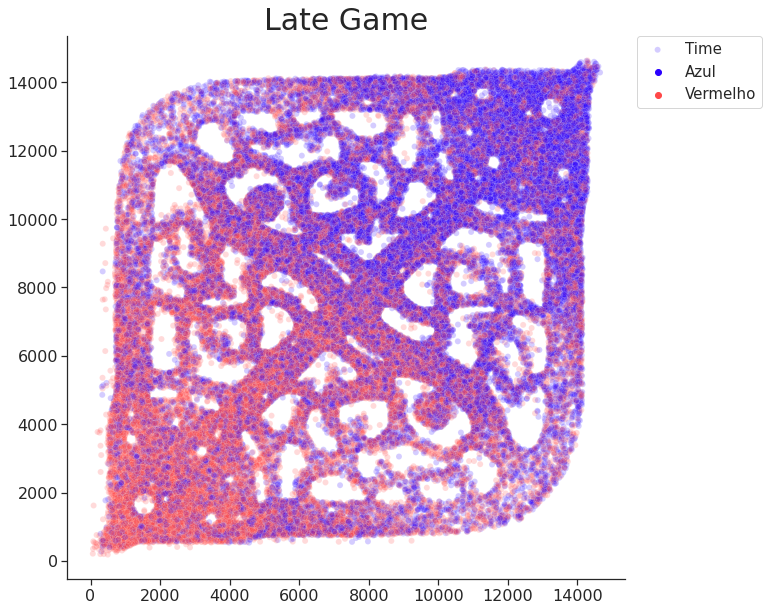

In [191]:
u = sns.scatterplot(data = LateKill, y='y_pos', x='x_pos', hue='Team', alpha=0.2, palette = ['#2A00FF', '#FF4848'])
u.set_title('Late Game', fontsize=30)
u.figure.set_size_inches(10,10)
u.tick_params(labelsize = 16)
u.set_xlabel('')
u.set_ylabel('')
plt.legend(labels = ['Time', 'Azul','Vermelho'], bbox_to_anchor=(1.02, 1), loc='upper left',prop={'size': 15}, borderaxespad=0)

### Por vitoria do time

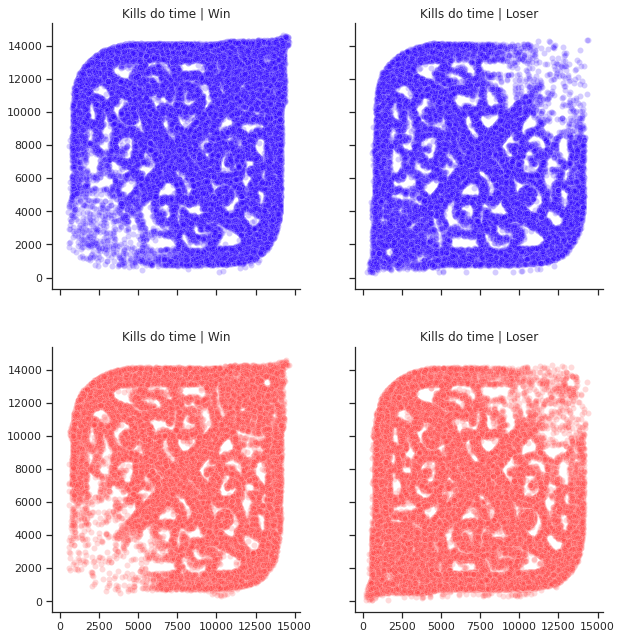

In [192]:
u = sns.FacetGrid(dfKills, col='bResult', row= "Team", hue="Team", palette=['#2A00FF', '#FF4848'])
u.map(sns.scatterplot,'y_pos', 'x_pos', alpha = 0.2)
u.figure.set_size_inches(10,10)
u.set_axis_labels(x_var='', y_var='')
u.set_titles(col_template="{col_name}", row_template="Kills do time")

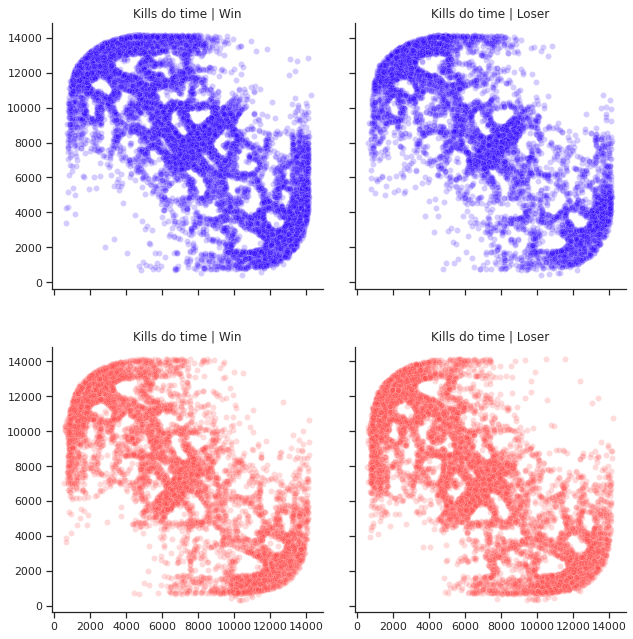

In [193]:
u = sns.FacetGrid(EarlyKill, col='bResult', row= "Team", hue="Team", palette=['#2A00FF', '#FF4848'])
u.map(sns.scatterplot,'y_pos', 'x_pos', alpha = 0.2)
u.figure.set_size_inches(10,10)
u.set_axis_labels(x_var='', y_var='')
u.set_titles(col_template="{col_name}", row_template="Kills do time")

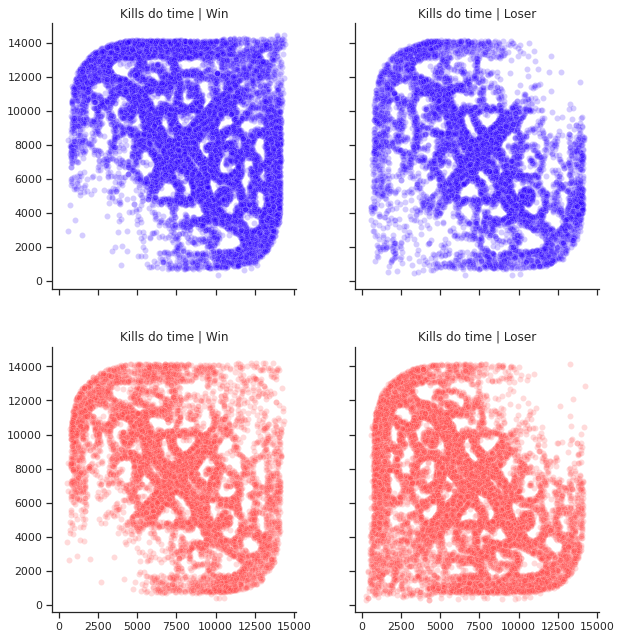

In [194]:
u = sns.FacetGrid(MidKill, col='bResult', row= "Team", hue="Team", palette=['#2A00FF', '#FF4848'])
u.map(sns.scatterplot,'y_pos', 'x_pos', alpha = 0.2)
u.figure.set_size_inches(10,10)
u.set_axis_labels(x_var='', y_var='')
u.set_titles(col_template="{col_name}", row_template="Kills do time")

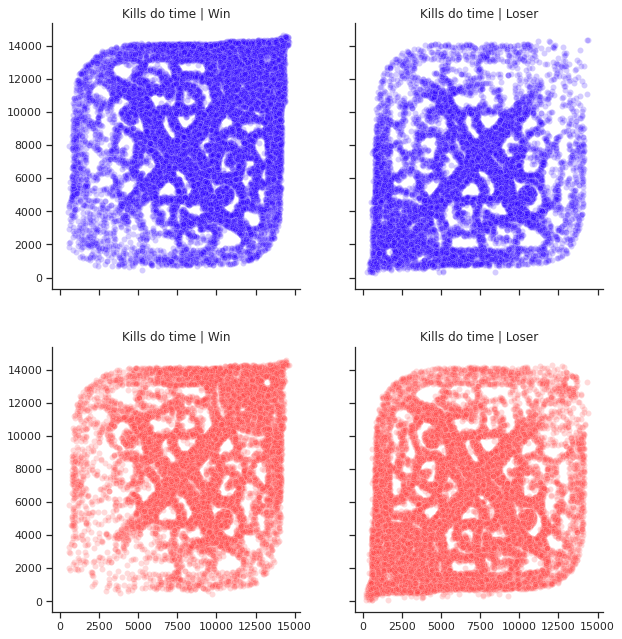

In [195]:
u = sns.FacetGrid(LateKill, col='bResult', row= "Team", hue="Team", palette=['#2A00FF', '#FF4848'])
u.map(sns.scatterplot,'y_pos', 'x_pos', alpha = 0.2)
u.figure.set_size_inches(10,10)
u.set_axis_labels(x_var='', y_var='')
u.set_titles(col_template="{col_name}", row_template="Kills do time")

### Analises de Ouro

In [160]:
dfGold = pd.read_csv('Datasets/gold.csv')
dfGold.merge(df_jogos)

Address            Type  \
0      http://matchhistory.na.leagueoflegends.com/en/...        golddiff   
1      http://matchhistory.na.leagueoflegends.com/en/...        goldblue   
2      http://matchhistory.na.leagueoflegends.com/en/...         goldred   
3      http://matchhistory.na.leagueoflegends.com/en/...     goldblueTop   
4      http://matchhistory.na.leagueoflegends.com/en/...  goldblueJungle   
...                                                  ...             ...   
99055  https://matchhistory.na.leagueoflegends.com/en...      goldredTop   
99056  https://matchhistory.na.leagueoflegends.com/en...   goldredJungle   
99057  https://matchhistory.na.leagueoflegends.com/en...   goldredMiddle   
99058  https://matchhistory.na.leagueoflegends.com/en...      goldredADC   
99059  https://matchhistory.na.leagueoflegends.com/en...  goldredSupport   

       min_1  min_2  min_3  min_4  min_5  min_6  min_7  min_8  ...  min_87  \
0          0      0    -14    -65   -268   -431   -488   -789  ...     NaN   
1       2415   2415   2711   3887   5068   6171   7412   8661  ...     NaN   
2       2415   2415   2725   3952   5336   6602   7900   9450  ...     NaN   
3        475    475    532    687    893   1058   1172   1471  ...     NaN   
4        475    475    532    870   1049   1276   1596   1815  ...     NaN   
...      ...    ...    ...    ...    ...    ...    ...    ...  ...     ...   
99055    500    500    581   1005   1225   1600   1774   2196  ...     NaN   
99056    500    500    721   1015   1336   1614   1938   2230  ...     NaN   
99057    500    500    598    968   1165   1477   1801   2016  ...     NaN   
99058    500    500    587    954   1327   1749   2007   2471  ...     NaN   
99059    500    500    585    793    998   1201   1373   1619  ...     NaN   

       min_88  min_89  min_90  min_91  min_92  min_93  min_94  min_95  IdJogo  
0         NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN       0  
1         NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN       0  
2         NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN       0  
3         NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN       0  
4         NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN       0  
...       ...     ...     ...     ...     ...     ...     ...     ...     ...  
99055     NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN    7619  
99056     NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN    7619  
99057     NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN    7619  
99058     NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN    7619  
99059     NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN    7619  

[99060 rows x 98 columns]

In [161]:
dfGold.Type.unique()

array(['golddiff', 'goldblue', 'goldred', 'goldblueTop', 'goldblueJungle',
       'goldblueMiddle', 'goldblueADC', 'goldblueSupport', 'goldredTop',
       'goldredJungle', 'goldredMiddle', 'goldredADC', 'goldredSupport'],
      dtype=object)

In [162]:
dfGold_golddiff = dfGold.loc[dfGold.Type == 'golddiff'] 
dfGold_Team = dfGold.loc[(dfGold.Type == 'goldblue') |( dfGold.Type == 'goldred')]
dfGold_BlueChamps = dfGold.loc[ ( dfGold.Type == 'goldblueTop') |
                                ( dfGold.Type == 'goldblueJungle') |
                                ( dfGold.Type == 'goldblueMiddle') |
                                ( dfGold.Type == 'goldblueADC') |
                                ( dfGold.Type == 'goldblueSupport') ]
dfGold_RedChamps = dfGold.loc[ ( dfGold.Type == 'goldredTop') |
                                ( dfGold.Type == 'goldredJungle') |
                                ( dfGold.Type == 'goldredMiddle') |
                                ( dfGold.Type == 'goldredADC') |
                                ( dfGold.Type == 'goldredSupport') ]

In [163]:
dfGold_golddiff = dfGold_golddiff.replace(to_replace=np.nan, value=0)
dfGold_golddiff = dfGold_golddiff.merge(LeagueofLegends[['Address', 'bResult', 'golddiff']])
dfGold_golddiff.bResult = dfGold_golddiff.bResult.map({1 : 'Win', 0 : 'Loser'})
dfGold_golddiff

Address      Type  min_1  \
0     http://matchhistory.na.leagueoflegends.com/en/...  golddiff      0   
1     http://matchhistory.na.leagueoflegends.com/en/...  golddiff      0   
2     http://matchhistory.na.leagueoflegends.com/en/...  golddiff      0   
3     http://matchhistory.na.leagueoflegends.com/en/...  golddiff      0   
4     http://matchhistory.na.leagueoflegends.com/en/...  golddiff     40   
...                                                 ...       ...    ...   
7615  https://matchhistory.euw.leagueoflegends.com/e...  golddiff      0   
7616  https://matchhistory.euw.leagueoflegends.com/e...  golddiff      0   
7617  https://matchhistory.na.leagueoflegends.com/en...  golddiff      0   
7618  https://matchhistory.na.leagueoflegends.com/en...  golddiff      0   
7619  https://matchhistory.na.leagueoflegends.com/en...  golddiff      0   

      min_2  min_3  min_4  min_5  min_6  min_7  min_8  ...  min_88  min_89  \
0         0    -14    -65   -268   -431   -488   -789  ...     0.0     0.0   
1         0    -26    -18    147    237   -152     18  ...     0.0     0.0   
2         0     10    -60     34     37    589   1064  ...     0.0     0.0   
3         0    -15     25    228     -6   -243    175  ...     0.0     0.0   
4        40     44    -36    113    158   -121   -191  ...     0.0     0.0   
...     ...    ...    ...    ...    ...    ...    ...  ...     ...     ...   
7615      0    -18    -95     45    -87   -117    199  ...     0.0     0.0   
7616      0    -86    -39   -207   -349    -60   -140  ...     0.0     0.0   
7617     -8     -6    116    103    -92   -470   -958  ...     0.0     0.0   
7618      0    -97     33    351    284    299    263  ...     0.0     0.0   
7619      0     -8   -225    -36     73    464    184  ...     0.0     0.0   

      min_90  min_91  min_92  min_93  min_94  min_95  bResult  \
0        0.0     0.0     0.0     0.0     0.0     0.0      Win   
1        0.0     0.0     0.0     0.0     0.0     0.0    Loser   
2        0.0     0.0     0.0     0.0     0.0     0.0      Win   
3        0.0     0.0     0.0     0.0     0.0     0.0    Loser   
4        0.0     0.0     0.0     0.0     0.0     0.0      Win   
...      ...     ...     ...     ...     ...     ...      ...   
7615     0.0     0.0     0.0     0.0     0.0     0.0    Loser   
7616     0.0     0.0     0.0     0.0     0.0     0.0    Loser   
7617     0.0     0.0     0.0     0.0     0.0     0.0    Loser   
7618     0.0     0.0     0.0     0.0     0.0     0.0      Win   
7619     0.0     0.0     0.0     0.0     0.0     0.0    Loser   

                                               golddiff  
0     [0, 0, -14, -65, -268, -431, -488, -789, -494,...  
1     [0, 0, -26, -18, 147, 237, -152, 18, 88, -242,...  
2     [0, 0, 10, -60, 34, 37, 589, 1064, 1258, 913, ...  
3     [0, 0, -15, 25, 228, -6, -243, 175, -346, 16, ...  
4     [40, 40, 44, -36, 113, 158, -121, -191, 23, 20...  
...                                                 ...  
7615  [0, 0, -18, -95, 45, -87, -117, 199, 126, 92, ...  
7616  [0, 0, -86, -39, -207, -349, -60, -140, 187, -...  
7617  [0, -8, -6, 116, 103, -92, -470, -958, -1998, ...  
7618  [0, 0, -97, 33, 351, 284, 299, 263, 403, 623, ...  
7619  [0, 0, -8, -225, -36, 73, 464, 184, 1171, 1409...  

[7620 rows x 99 columns]

In [164]:
amostraGold = dfGold_golddiff.sample(n=20, random_state=1)
amostraGoldBlue = amostraGold.loc[amostraGold.bResult == 'Win'].drop(columns = 'golddiff')
amostraGoldRed = amostraGold.loc[amostraGold.bResult == 'Loser'].drop(columns = 'golddiff')
TAmostraGoldBlue = amostraGoldBlue.T
TAmostraGoldRed = amostraGoldRed.T
TAmostraGoldBlue = TAmostraGoldBlue[2:97:1]
TAmostraGoldRed = TAmostraGoldRed[2:97:1]
idx = range(1,95)
TAmostraGoldBlue['minutos'] = range(1,96)
TAmostraGoldRed['minutos'] = range(1,96)
TAmostraGoldBlue = TAmostraGoldBlue.set_index('minutos')
TAmostraGoldRed = TAmostraGoldRed.set_index('minutos')


In [165]:
amostraGold

Address      Type  min_1  \
2702  http://matchhistory.na.leagueoflegends.com/en/...  golddiff      0   
3639  http://matchhistory.na.leagueoflegends.com/en/...  golddiff      0   
4413  http://matchhistory.tr.leagueoflegends.com/tr/...  golddiff      0   
1882  http://matchhistory.na.leagueoflegends.com/en/...  golddiff      0   
2965  http://matchhistory.na.leagueoflegends.com/en/...  golddiff      0   
6242  http://matchhistory.na.leagueoflegends.com/en/...  golddiff      0   
1160  http://matchhistory.euw.leagueoflegends.com/en...  golddiff      0   
1409  http://matchhistory.na.leagueoflegends.com/en/...  golddiff      0   
5877  http://matchhistory.na.leagueoflegends.com/en/...  golddiff      0   
3283  http://matchhistory.na.leagueoflegends.com/en/...  golddiff      0   
2851  http://matchhistory.na.leagueoflegends.com/en/...  golddiff      0   
4475  http://matchhistory.tr.leagueoflegends.com/tr/...  golddiff      0   
3014  http://matchhistory.na.leagueoflegends.com/en/...  golddiff      0   
5367  http://matchhistory.oce.leagueoflegends.com/en...  golddiff      0   
6678  http://matchhistory.na.leagueoflegends.com/en/...  golddiff      0   
5818  http://matchhistory.lan.leagueoflegends.com/es...  golddiff      0   
3004  http://matchhistory.na.leagueoflegends.com/en/...  golddiff      0   
5207  http://matchhistory.oce.leagueoflegends.com/en...  golddiff      0   
5107  http://matchhistory.oce.leagueoflegends.com/en...  golddiff      0   
6206  http://matchhistory.na.leagueoflegends.com/en/...  golddiff      0   

      min_2  min_3  min_4  min_5  min_6  min_7  min_8  ...  min_88  min_89  \
2702      0    -32    -63   -200    127   -145   -158  ...     0.0     0.0   
3639    -10     30    258    338    137    382    380  ...     0.0     0.0   
4413      0      6    -62   -163   -349  -1137   -329  ...     0.0     0.0   
1882      0     16    242     50    185    365     63  ...     0.0     0.0   
2965      0   -114     -4    -68     -1     42   -318  ...     0.0     0.0   
6242     10     44    244   -199    -44    111    524  ...     0.0     0.0   
1160    -20    -35    143    -32   -110    109   -251  ...     0.0     0.0   
1409      0    -91   -154   -196   -334   -336   -418  ...     0.0     0.0   
5877      0    499    858   1603   1031   2157   3269  ...     0.0     0.0   
3283      0     19    309    209   -132   -129   -689  ...     0.0     0.0   
2851      0    -68    481    239     28   -179   -417  ...     0.0     0.0   
4475      0     14   -169   -582   -450   -809    -19  ...     0.0     0.0   
3014    -16     -9   -105    448    489    358  -1052  ...     0.0     0.0   
5367      0     51     98  -1043   -918  -1442  -1675  ...     0.0     0.0   
6678      0     51   -430   -533   -222    140    223  ...     0.0     0.0   
5818      0     22    158     93   -292   -348  -1083  ...     0.0     0.0   
3004      0     -4    253    614    948    793   1241  ...     0.0     0.0   
5207      0     53   -390   -433   -427   -471  -1142  ...     0.0     0.0   
5107     30      5     11    -16    142    370    208  ...     0.0     0.0   
6206      8    -47    222    336    -69    150     90  ...     0.0     0.0   

      min_90  min_91  min_92  min_93  min_94  min_95  bResult  \
2702     0.0     0.0     0.0     0.0     0.0     0.0    Loser   
3639     0.0     0.0     0.0     0.0     0.0     0.0    Loser   
4413     0.0     0.0     0.0     0.0     0.0     0.0    Loser   
1882     0.0     0.0     0.0     0.0     0.0     0.0    Loser   
2965     0.0     0.0     0.0     0.0     0.0     0.0    Loser   
6242     0.0     0.0     0.0     0.0     0.0     0.0      Win   
1160     0.0     0.0     0.0     0.0     0.0     0.0      Win   
1409     0.0     0.0     0.0     0.0     0.0     0.0      Win   
5877     0.0     0.0     0.0     0.0     0.0     0.0      Win   
3283     0.0     0.0     0.0     0.0     0.0     0.0    Loser   
2851     0.0     0.0     0.0     0.0     0.0     0.0      Win   
4475     0.0     0.0     0.0    

In [166]:
TAmostraGoldBlue

6242 1160  1409  5877 2851  4475  3014  5207 5107 6206
minutos                                                        
1           0    0     0     0    0     0     0     0    0    0
2          10  -20     0     0    0     0   -16     0   30    8
3          44  -35   -91   499  -68    14    -9    53    5  -47
4         244  143  -154   858  481  -169  -105  -390   11  222
5        -199  -32  -196  1603  239  -582   448  -433  -16  336
...       ...  ...   ...   ...  ...   ...   ...   ...  ...  ...
91        0.0  0.0   0.0   0.0  0.0   0.0   0.0   0.0  0.0  0.0
92        0.0  0.0   0.0   0.0  0.0   0.0   0.0   0.0  0.0  0.0
93        0.0  0.0   0.0   0.0  0.0   0.0   0.0   0.0  0.0  0.0
94        0.0  0.0   0.0   0.0  0.0   0.0   0.0   0.0  0.0  0.0
95        0.0  0.0   0.0   0.0  0.0   0.0   0.0   0.0  0.0  0.0

[95 rows x 10 columns]

In [167]:
np.array(TAmostraGoldBlue.columns)

array([6242, 1160, 1409, 5877, 2851, 4475, 3014, 5207, 5107, 6206],
      dtype=object)

Text(0.5, 1.0, 'Diferença de ouro time azul')

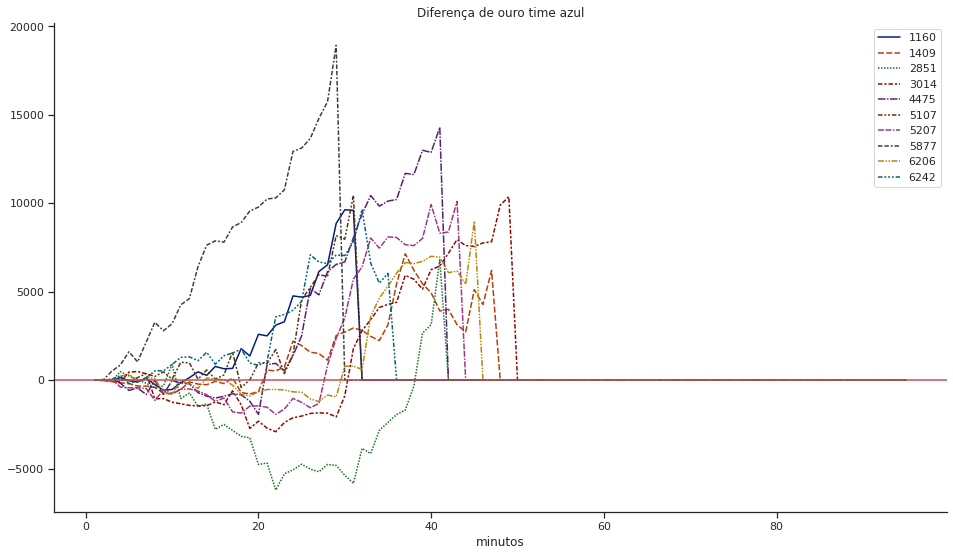

In [168]:
ax = sns.lineplot(data = TAmostraGoldBlue, palette = 'dark')
ax.figure.set_size_inches(16,9)
plt.axhline(y=0, color='r', linestyle='-')
ax.set_title("Diferença de ouro time azul")

Text(0.5, 1.0, 'Diferença de ouro time azul')

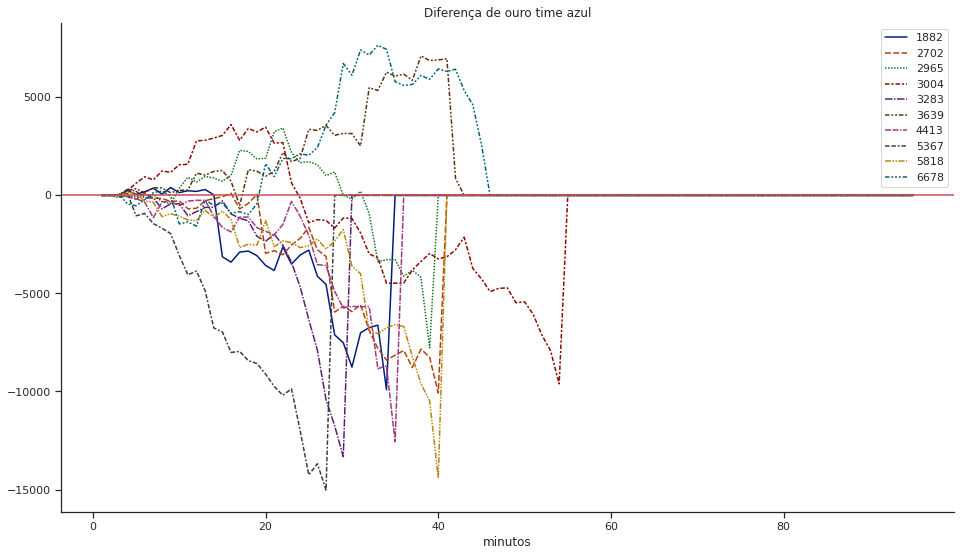

In [169]:
ax = sns.lineplot(data = TAmostraGoldRed, palette = 'dark')
ax.figure.set_size_inches(16,9)
plt.axhline(y=0, color='r', linestyle='-')
ax.set_title("Diferença de ouro time azul")

In [170]:
amostraGoldBlue

Address      Type  min_1  \
6242  http://matchhistory.na.leagueoflegends.com/en/...  golddiff      0   
1160  http://matchhistory.euw.leagueoflegends.com/en...  golddiff      0   
1409  http://matchhistory.na.leagueoflegends.com/en/...  golddiff      0   
5877  http://matchhistory.na.leagueoflegends.com/en/...  golddiff      0   
2851  http://matchhistory.na.leagueoflegends.com/en/...  golddiff      0   
4475  http://matchhistory.tr.leagueoflegends.com/tr/...  golddiff      0   
3014  http://matchhistory.na.leagueoflegends.com/en/...  golddiff      0   
5207  http://matchhistory.oce.leagueoflegends.com/en...  golddiff      0   
5107  http://matchhistory.oce.leagueoflegends.com/en...  golddiff      0   
6206  http://matchhistory.na.leagueoflegends.com/en/...  golddiff      0   

      min_2  min_3  min_4  min_5  min_6  min_7  min_8  ...  min_87  min_88  \
6242     10     44    244   -199    -44    111    524  ...     0.0     0.0   
1160    -20    -35    143    -32   -110    109   -251  ...     0.0     0.0   
1409      0    -91   -154   -196   -334   -336   -418  ...     0.0     0.0   
5877      0    499    858   1603   1031   2157   3269  ...     0.0     0.0   
2851      0    -68    481    239     28   -179   -417  ...     0.0     0.0   
4475      0     14   -169   -582   -450   -809    -19  ...     0.0     0.0   
3014    -16     -9   -105    448    489    358  -1052  ...     0.0     0.0   
5207      0     53   -390   -433   -427   -471  -1142  ...     0.0     0.0   
5107     30      5     11    -16    142    370    208  ...     0.0     0.0   
6206      8    -47    222    336    -69    150     90  ...     0.0     0.0   

      min_89  min_90  min_91  min_92  min_93  min_94  min_95  bResult  
6242     0.0     0.0     0.0     0.0     0.0     0.0     0.0      Win  
1160     0.0     0.0     0.0     0.0     0.0     0.0     0.0      Win  
1409     0.0     0.0     0.0     0.0     0.0     0.0     0.0      Win  
5877     0.0     0.0     0.0     0.0     0.0     0.0     0.0      Win  
2851     0.0     0.0     0.0     0.0     0.0     0.0     0.0      Win  
4475     0.0     0.0     0.0     0.0     0.0     0.0     0.0      Win  
3014     0.0     0.0     0.0     0.0     0.0     0.0     0.0      Win  
5207     0.0     0.0     0.0     0.0     0.0     0.0     0.0      Win  
5107     0.0     0.0     0.0     0.0     0.0     0.0     0.0      Win  
6206     0.0     0.0     0.0     0.0     0.0     0.0     0.0      Win  

[10 rows x 98 columns]

### Vitorias por time

Text(0.5, 1.0, 'Vitórias por time')

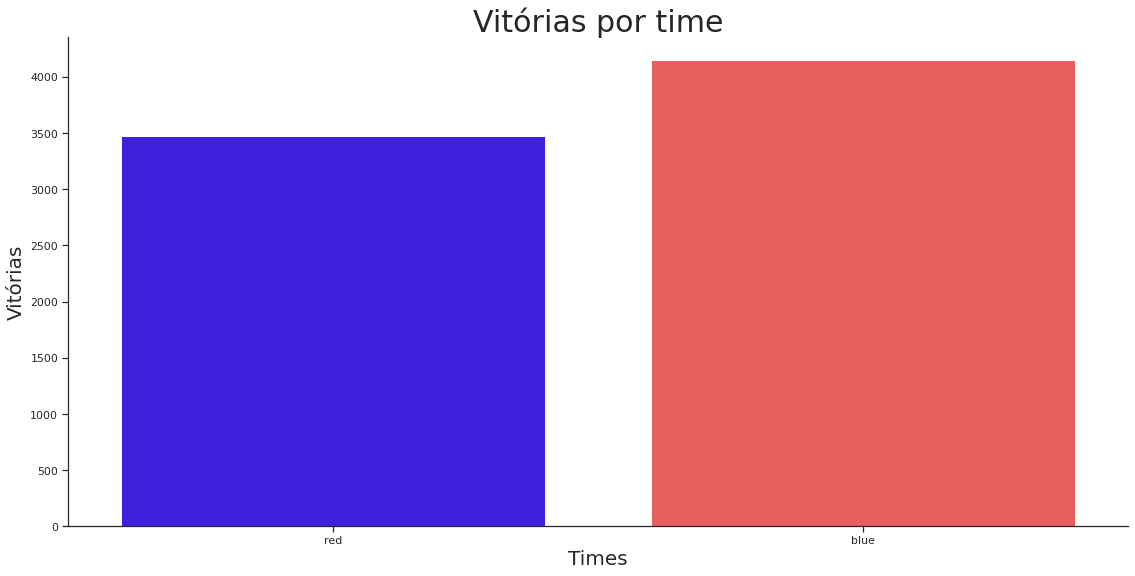

In [196]:
labels = ['red', 'blue']
wins = [dfmatchinfo.rResult.sum(), dfmatchinfo.bResult.sum()]
wg = sns.barplot(x = labels, y = wins, palette = ['#2A00FF', '#FF4848'])
wg.set_xlabel('Times', fontsize = 20)
wg.set_ylabel('Vitórias',fontsize = 20)
wg.figure.set_size_inches(19,9)
wg.set_title('Vitórias por time', fontsize = 30)

### Jogadas por temporada

Text(0.5, 1.0, 'Jogadas por Temporada')

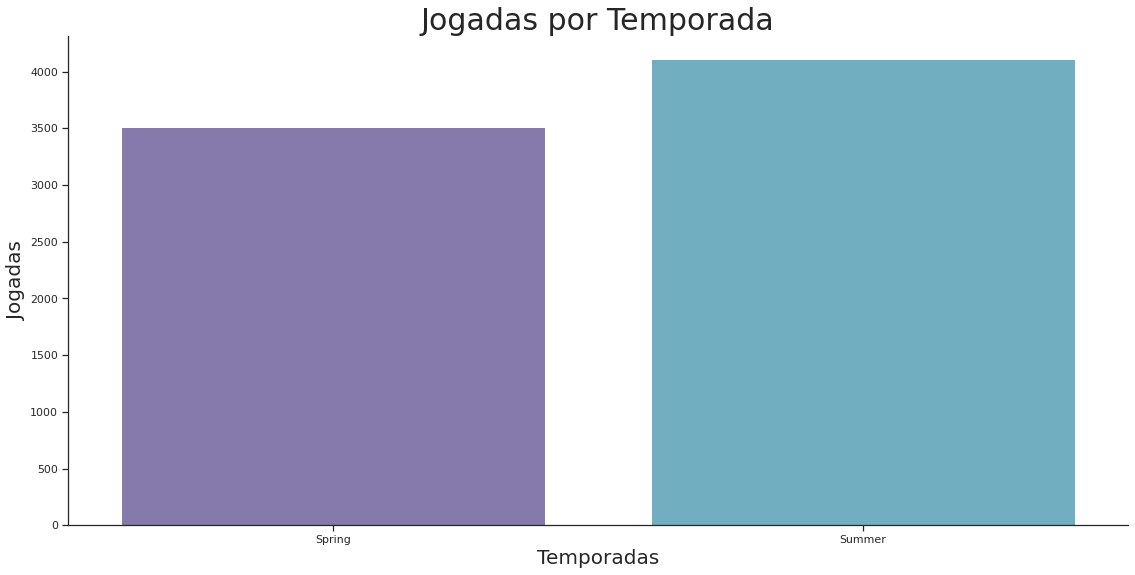

In [172]:
seasons = Counter(LeagueofLegends.Season)
sg = sns.barplot(x = list(seasons.keys()), y = list(seasons.values()), palette = ['m', 'c'])
sg.figure.set_size_inches(19,9)
sg.set_xlabel('Temporadas', fontsize = 20)
sg.set_ylabel('Jogadas', fontsize = 20)
sg.set_title('Jogadas por Temporada', fontsize = 30)

### Ordens de monstro para levar

In [173]:
dfMonsters = pd.read_csv('Datasets/monsters.csv')
dfMonsters = dfMonsters.merge(df_jogos)
dfMonsters = dfMonsters.merge(LeagueofLegends[['bResult', 'Address']])
dfMonsters['bResult'] = dfMonsters.bResult.map({1 : 'Win', 0 : 'Loser'})

In [174]:
dfMonsters

Address      Team    Time  \
0      http://matchhistory.na.leagueoflegends.com/en/...  bDragons  37.267   
1      http://matchhistory.na.leagueoflegends.com/en/...  rDragons  17.140   
2      http://matchhistory.na.leagueoflegends.com/en/...  rDragons  30.934   
3      http://matchhistory.na.leagueoflegends.com/en/...  rDragons  24.641   
4      http://matchhistory.na.leagueoflegends.com/en/...   rBarons  29.954   
...                                                  ...       ...     ...   
44243  http://matchhistory.br.leagueoflegends.com/pt/...   rBarons  29.836   
44244  http://matchhistory.lan.leagueoflegends.com/es...   rBarons  20.690   
44245  http://matchhistory.na.leagueoflegends.com/en/...  rHeralds  19.143   
44246  http://matchhistory.na.leagueoflegends.com/en/...  rHeralds  12.599   
44247  http://matchhistory.na.leagueoflegends.com/en/...  rHeralds  16.843   

               Type  IdJogo bResult  
0            DRAGON       0     Win  
1            DRAGON       0     Win  
2            DRAGON       0     Win  
3            DRAGON       0     Win  
4      BARON_NASHOR       0     Win  
...             ...     ...     ...  
44243  BARON_NASHOR    4300   Loser  
44244  BARON_NASHOR    5722   Loser  
44245   RIFT_HERALD    1388   Loser  
44246   RIFT_HERALD    1388   Loser  
44247   RIFT_HERALD    7037   Loser  

[44248 rows x 6 columns]

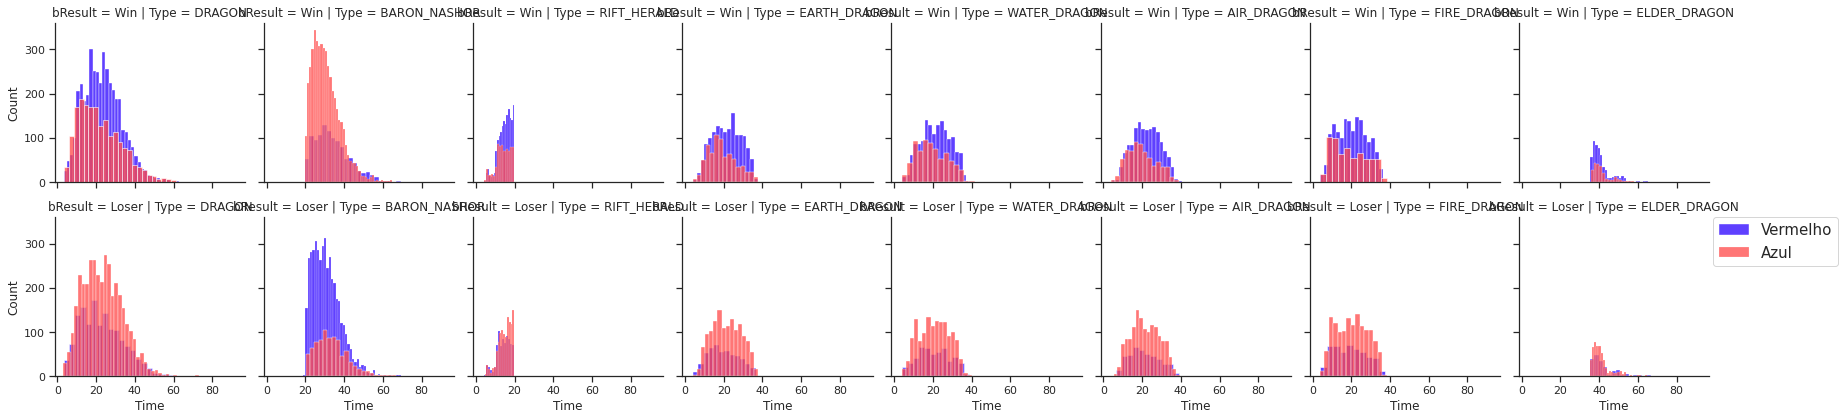

In [197]:
mg = sns.FacetGrid(data=dfMonsters, col = 'Type', row = 'bResult', hue = 'Team', palette = ['#2A00FF', '#FF4848'])
mg.map(sns.histplot, 'Time')
plt.legend(labels = ['Vermelho','Azul'], bbox_to_anchor=(1.02, 1), loc='upper left',prop={'size': 15}, borderaxespad=0)


### Quando pegar o arauto

<AxesSubplot:xlabel='Time', ylabel='Count'>

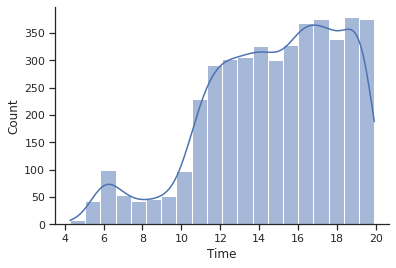

In [176]:
Arauto = dfMonsters.loc[dfMonsters.Type == 'RIFT_HERALD']
sns.histplot(Arauto, x = 'Time', bins = 20, kde = True)


In [177]:
arautoBlue = Arauto.loc[Arauto.bResult == 'Win']
arautoRed = Arauto.loc[Arauto.bResult == 'Loser']

<AxesSubplot:xlabel='Time', ylabel='Count'>

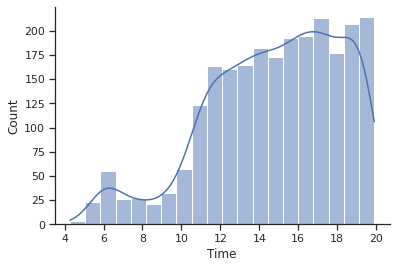

In [178]:
sns.histplot(arautoBlue, x = 'Time', bins = 20, kde = True)

<AxesSubplot:xlabel='Time', ylabel='Count'>

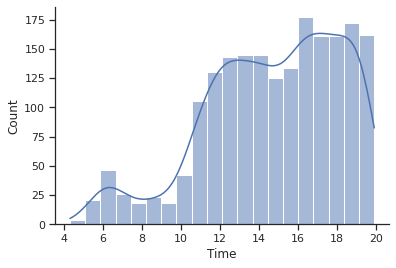

In [179]:
sns.histplot(arautoRed, x = 'Time', bins = 20, kde = True)

## Analise de Matchs:

#### Time que mais Ganhou

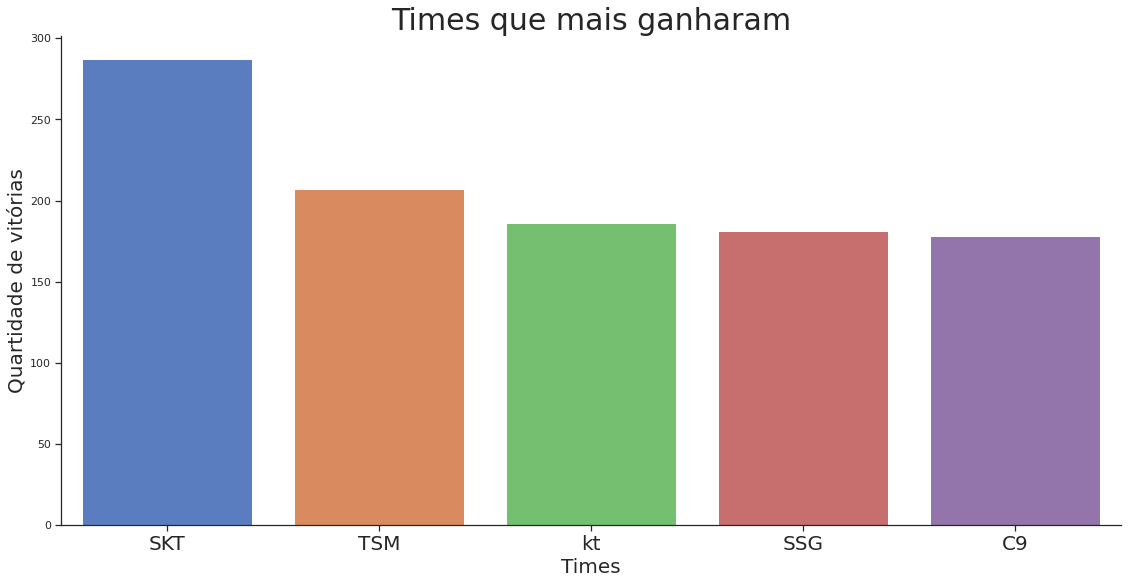

In [184]:
blues_wins = dfmatchinfo[dfmatchinfo.bResult == 1].dropna().value_counts('blueTeamTag')

red_wins = dfmatchinfo[dfmatchinfo.rResult == 1].dropna().value_counts('redTeamTag')

team_count = pd.DataFrame((blues_wins + red_wins)).reset_index()
team_count.columns = ['Time', 'q_vitorias']
team_count.sort_values(by = 'q_vitorias', ascending= False).head(5)
a = sns.barplot(data = team_count.sort_values(by = 'q_vitorias', ascending= False).head(5), 
                x = 'Time', y = 'q_vitorias', palette='muted')
a.set_title('Times que mais ganharam', fontsize = 30)
a.set_xlabel('Times', fontsize = 20)
a.set_ylabel('Quartidade de vitórias', fontsize = 20)
a.figure.set_size_inches(19,9)
a.tick_params(labelsize = 20, axis='x')

### Time que mais perdeu

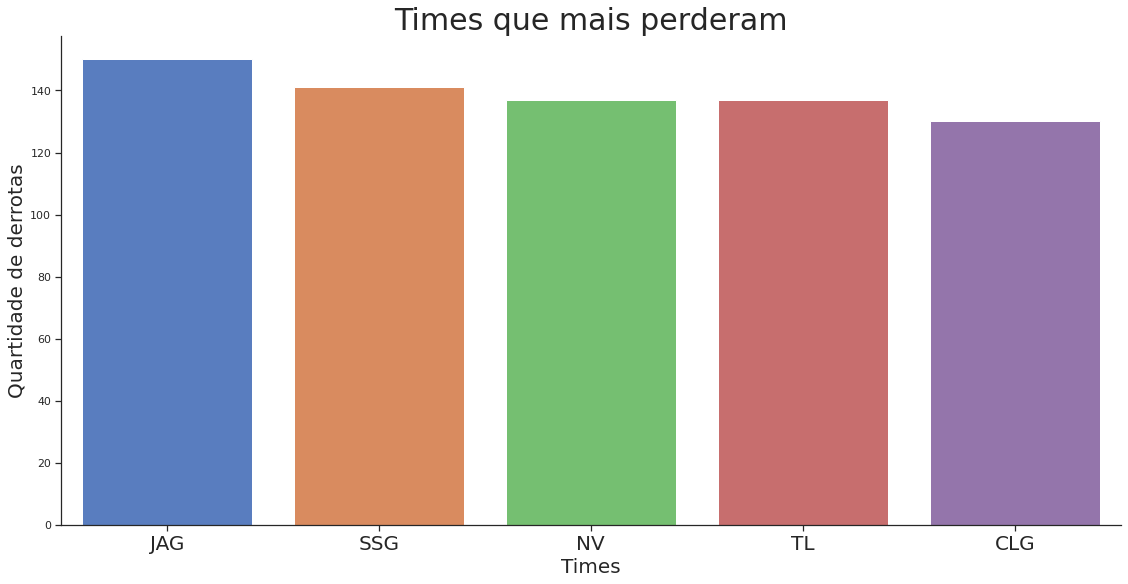

In [181]:
blues_loss = dfmatchinfo[dfmatchinfo.bResult == 0].dropna().value_counts('blueTeamTag')
red_loss = dfmatchinfo[dfmatchinfo.rResult == 0].dropna().value_counts('redTeamTag')

loss_count = pd.DataFrame((blues_loss + red_loss)).reset_index()
loss_count.columns = ['Time', 'q_derrotas']

a = sns.barplot(data = loss_count.sort_values(by = 'q_derrotas', ascending= False).head(), 
                x = 'Time', y = 'q_derrotas', palette='muted')
a.set_title('Times que mais perderam', fontsize = 30)
a.set_xlabel('Times', fontsize = 20)
a.set_ylabel('Quartidade de derrotas', fontsize = 20)
a.figure.set_size_inches(19,9)
a.tick_params(labelsize = 20, axis='x')

### Qual Campeão mais banido

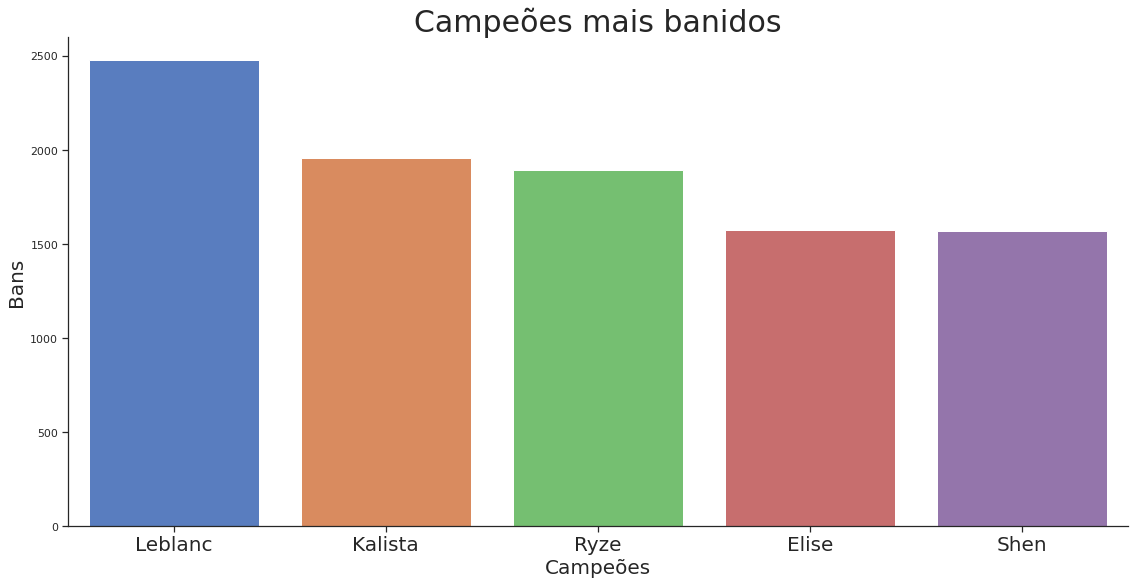

In [185]:
bans_df = pd.read_csv('Datasets/bans.csv')
banidos = pd.concat([bans_df.ban_1.dropna(), bans_df.ban_2.dropna(), bans_df.ban_3.dropna(), bans_df.ban_4.dropna(), 
                     bans_df.ban_5.dropna()]).reset_index(drop = True)
banidos_count = Counter(banidos)

banidos_count_s = pd.DataFrame(pd.Series(banidos_count))
banidos_count_s.reset_index(inplace=True)
banidos_count_s.columns = ['champ', 'count']

a = sns.barplot(data = banidos_count_s.sort_values(by = 'count', ascending=False).head(), x = 'champ', y = 'count', palette='muted')
a.set_title('Campeões mais banidos', fontsize = 30)
a.set_xlabel('Campeões', fontsize = 20)
a.set_ylabel('Bans', fontsize = 20)
a.figure.set_size_inches(19,9)
a.tick_params(labelsize = 20, axis='x')

### Qual Campeão mais usado:

In [183]:
champ_coisas = []
for i in dfmatchinfo.columns:
    if 'Champ' in i:
        champ_coisas.append(eval('dfmatchinfo.'  + i))

series_champs = pd.concat(champ_coisas).reset_index(drop = True)
champsy = pd.DataFrame(teams, columns = ['champ'])
champs_frequency = pd.DataFrame(champsy.value_counts()).reset_index()
champs_frequency.columns = ['champ', 'frequency']
champs_frequency.head()

NameError: name 'teams' is not defined

### Estruturas

#### Quando levar a primeira Torre

In [ ]:
Torres = pd.read_csv('Datasets/structures.csv')
Torres = Torres.dropna()
Torres

Address     Team    Time  \
0       http://matchhistory.na.leagueoflegends.com/en/...  bTowers  27.542   
1       http://matchhistory.na.leagueoflegends.com/en/...  bTowers  39.269   
2       http://matchhistory.na.leagueoflegends.com/en/...  bTowers  33.583   
3       http://matchhistory.na.leagueoflegends.com/en/...  bTowers  23.038   
4       http://matchhistory.na.leagueoflegends.com/en/...  bTowers  16.556   
...                                                   ...      ...     ...   
121380  https://matchhistory.na.leagueoflegends.com/en...  rInhibs  18.959   
121381  https://matchhistory.na.leagueoflegends.com/en...  rInhibs  22.992   
121383  https://matchhistory.na.leagueoflegends.com/en...  rInhibs  37.152   
121384  https://matchhistory.na.leagueoflegends.com/en...  rInhibs  41.194   
121385  https://matchhistory.na.leagueoflegends.com/en...  rInhibs  37.880   

            Lane          Type  
0       MID_LANE   BASE_TURRET  
1       MID_LANE  NEXUS_TURRET  
2       BOT_LANE  INNER_TURRET  
3       TOP_LANE  INNER_TURRET  
4       BOT_LANE  OUTER_TURRET  
...          ...           ...  
121380  BOT_LANE     INHIBITOR  
121381  TOP_LANE     INHIBITOR  
121383  BOT_LANE     INHIBITOR  
121384  TOP_LANE     INHIBITOR  
121385  MID_LANE     INHIBITOR  

[113780 rows x 5 columns]

In [ ]:
Torres = Torres.merge(df_jogos)
Torres

Address     Team    Time  \
0       http://matchhistory.na.leagueoflegends.com/en/...  bTowers  27.542   
1       http://matchhistory.na.leagueoflegends.com/en/...  bTowers  39.269   
2       http://matchhistory.na.leagueoflegends.com/en/...  bTowers  33.583   
3       http://matchhistory.na.leagueoflegends.com/en/...  bTowers  23.038   
4       http://matchhistory.na.leagueoflegends.com/en/...  bTowers  16.556   
...                                                   ...      ...     ...   
113775  https://matchhistory.na.leagueoflegends.com/en...  rTowers  23.042   
113776  https://matchhistory.na.leagueoflegends.com/en...  rTowers  13.845   
113777  https://matchhistory.na.leagueoflegends.com/en...  rInhibs  23.575   
113778  https://matchhistory.na.leagueoflegends.com/en...  rInhibs  18.959   
113779  https://matchhistory.na.leagueoflegends.com/en...  rInhibs  22.992   

            Lane          Type  IdJogo  
0       MID_LANE   BASE_TURRET       0  
1       MID_LANE  NEXUS_TURRET       0  
2       BOT_LANE  INNER_TURRET       0  
3       TOP_LANE  INNER_TURRET       0  
4       BOT_LANE  OUTER_TURRET       0  
...          ...           ...     ...  
113775  MID_LANE   BASE_TURRET    7617  
113776  TOP_LANE  INNER_TURRET    7617  
113777  MID_LANE     INHIBITOR    7617  
113778  BOT_LANE     INHIBITOR    7617  
113779  TOP_LANE     INHIBITOR    7617  

[113780 rows x 6 columns]

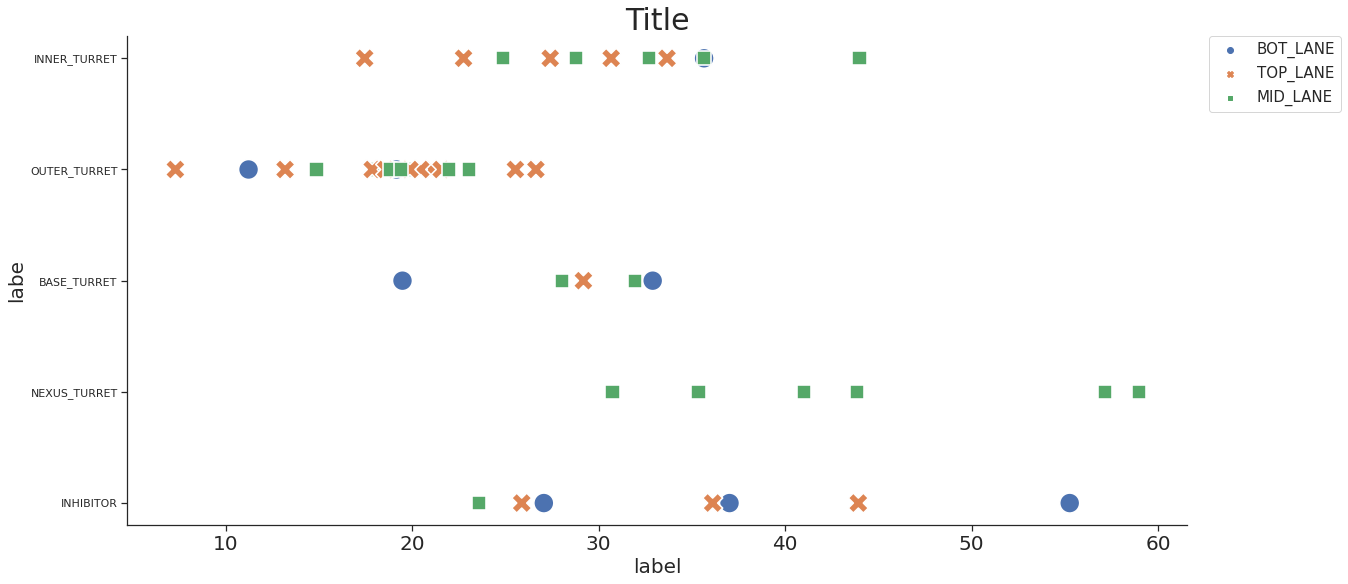

In [ ]:
jogos = Torres.sample(n=50, random_state=1)
jogo1 = Torres.loc[Torres['IdJogo'] == 0]
jogo1.sort_values(ascending=True, by='Time')
ax = sns.scatterplot(data = jogos, x='Time', y='Type', style = "Lane", hue = "Lane", s = 400)
plt.legend( bbox_to_anchor=(1.02, 1), loc='upper left',prop={'size': 15}, borderaxespad=0)
ax.figure.set_size_inches(19,9)
ax.set_title('Title', fontsize = 30)
ax.set_xlabel('label', fontsize = 20)
ax.set_ylabel('labe', fontsize = 20)
ax.tick_params(labelsize = 20, axis='x')


In [ ]:
amostraEarlykills = EarlyKill.sample(n=1000, random_state=1)
amostraMidkills = MidKill.sample(n=1000, random_state=1)
amostraLatekills = LateKill.sample(n=1000, random_state=1)

In [ ]:
kmeans_df = KMeans(n_clusters=2)
kmeans_df.fit(amostraEarlykills[['x_pos','y_pos']])

KMeans(n_clusters=2)

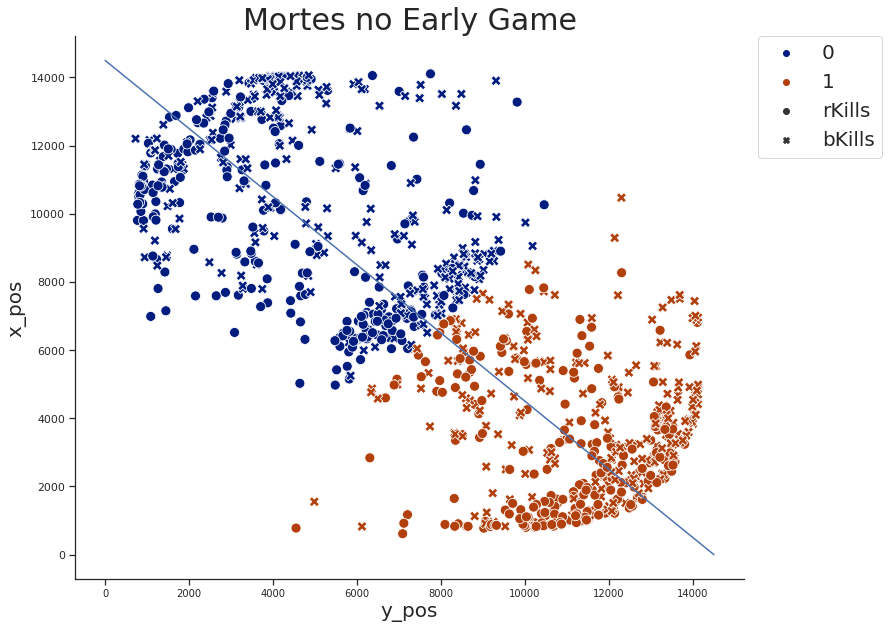

In [ ]:
ax = sns.scatterplot(data=amostraEarlykills, y='y_pos', x='x_pos', hue=kmeans_df.labels_, palette = 'dark', style = 'Team', s=100)
ax.figure.set_size_inches(12,10)
ax.set_title('Mortes no Early Game', fontsize = 30)
ax.set_xlabel('y_pos', fontsize = 20)
ax.set_ylabel('x_pos', fontsize = 20)
ax.tick_params(labelsize = 10, axis='x')
plt.legend( bbox_to_anchor=(1.02, 1), loc='upper left',prop={'size': 20}, borderaxespad=0)

# ------ linha vertical
xdata = list(range(0,14500))
ydata = list(range(14500,0,-1))
plt.plot(xdata, ydata)



In [ ]:
kmeans_df = KMeans(n_clusters=2)
kmeans_df.fit(amostraMidkills[['x_pos','y_pos']])

KMeans(n_clusters=2)

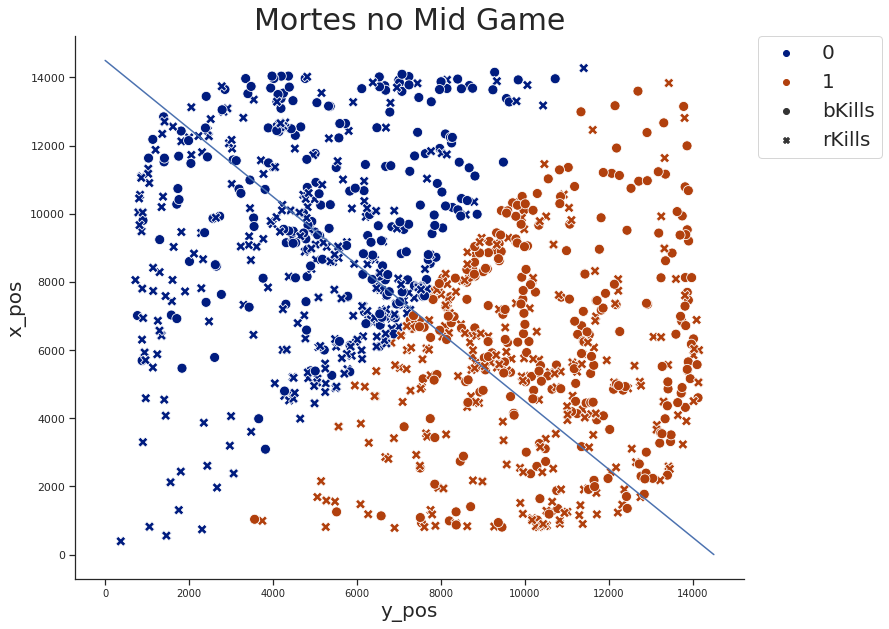

In [ ]:
ax = sns.scatterplot(data=amostraMidkills, y='y_pos', x='x_pos', hue=kmeans_df.labels_, palette = 'dark', style = 'Team', s=100)
ax.figure.set_size_inches(12,10)
ax.set_title('Mortes no Mid Game', fontsize = 30)
ax.set_xlabel('y_pos', fontsize = 20)
ax.set_ylabel('x_pos', fontsize = 20)
ax.tick_params(labelsize = 10, axis='x')
plt.legend( bbox_to_anchor=(1.02, 1), loc='upper left',prop={'size': 20}, borderaxespad=0)

# ------ linha vertical
xdata = list(range(0,14500))
ydata = list(range(14500,0,-1))
plt.plot(xdata, ydata)


In [ ]:
kmeans_df = KMeans(n_clusters=2)
kmeans_df.fit(amostraLatekills[['x_pos','y_pos']])

KMeans(n_clusters=2)

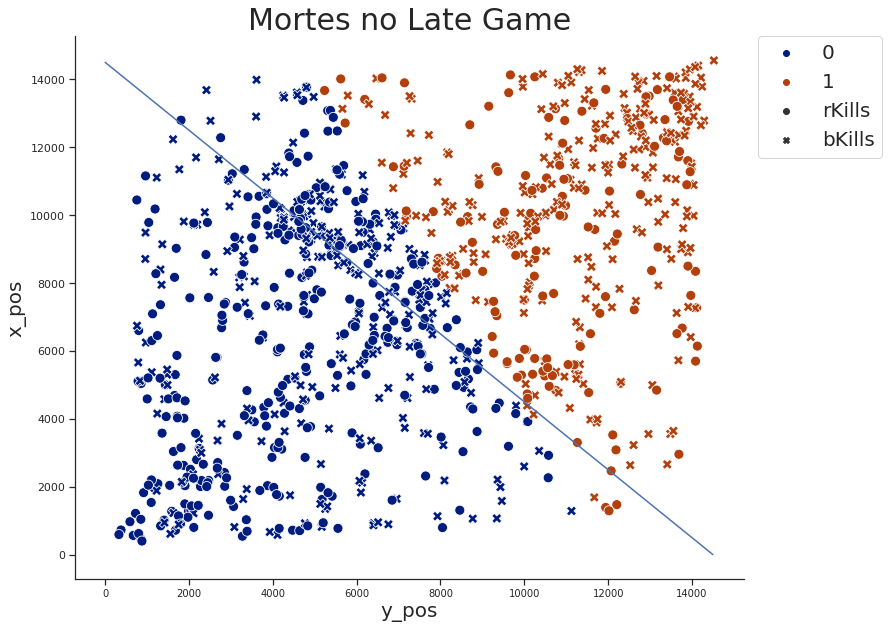

In [ ]:
ax = sns.scatterplot(data=amostraLatekills, y='y_pos', x='x_pos', hue=kmeans_df.labels_, palette = 'dark', style = 'Team', s=100)
ax.figure.set_size_inches(12,10)
ax.set_title('Mortes no Late Game', fontsize = 30)
ax.set_xlabel('y_pos', fontsize = 20)
ax.set_ylabel('x_pos', fontsize = 20)
ax.tick_params(labelsize = 10, axis='x')
plt.legend( bbox_to_anchor=(1.02, 1), loc='upper left',prop={'size': 20}, borderaxespad=0)

# ------ linha vertical
xdata = list(range(0,14500))
ydata = list(range(14500,0,-1))
plt.plot(xdata, ydata)
